# Ejercicio 1

## Ejercicio 1.1  Ejecutar y analizar el siguiente código

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import CategoricalDtype
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('Groceries_dataset.csv')

data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [24]:
# se crean nuevas columnas con información de fechas

spliting = data['Date'].str.split(pat = '-', expand = True)
data['Day'] = spliting[0]
data['Month'] = spliting[1]
data['Year'] = spliting[2]

# cambiando el formato de fecha
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

data['Month'] = data['Month'].apply(lambda x: look_up[x])

date_format = '%d-%m-%Y'

# conversión de la fecha a datetime
data['Date'] = pd.to_datetime(data['Date'], format=date_format)
data['day_of_week'] = data['Date'].dt.strftime('%A')

# día de la semana
data['weekday_weekend'] = data['day_of_week'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

data

Member_number       Date        itemDescription Day Month  Year  \
0               1808 2015-07-21         tropical fruit  21   Jul  2015   
1               2552 2015-01-05             whole milk  05   Jan  2015   
2               2300 2015-09-19              pip fruit  19   Sep  2015   
3               1187 2015-12-12       other vegetables  12   Dec  2015   
4               3037 2015-02-01             whole milk  01   Feb  2015   
...              ...        ...                    ...  ..   ...   ...   
38760           4471 2014-10-08          sliced cheese  08   Oct  2014   
38761           2022 2014-02-23                  candy  23   Feb  2014   
38762           1097 2014-04-16               cake bar  16   Apr  2014   
38763           1510 2014-12-03  fruit/vegetable juice  03   Dec  2014   
38764           1521 2014-12-26               cat food  26   Dec  2014   

      day_of_week weekday_weekend  
0         Tuesday         weekday  
1          Monday         weekday  
2        Saturday         weekend  
3        Saturday         weekend  
4          Sunday         weekend  
...           ...             ...  
38760   Wednesday         weekday  
38761      Sunday         weekend  
38762   Wednesday         weekday  
38763   Wednesday         weekday  
38764      Friday         weekday  

[38765 rows x 8 columns]

## Ejercicio 1.2 Análisis Descriptivo

En base al dataset, crear código para responder a las siguientes preguntas:

1. ¿Cuales son los items que más aparecen en el dataset?
2. Crear una serie de tiempo con la cantidad de items vendidos mensualmente 
3. Cantidad total de items vendidos por año

In [25]:
# inserte su código aquí

data.value_counts()


Member_number  Date        itemDescription  Day  Month  Year  day_of_week  weekday_weekend
1994           2015-03-11  whole milk       11   Mar    2015  Wednesday    weekday            4
4843           2015-05-13  whole milk       13   May    2015  Wednesday    weekday            3
2319           2015-05-10  yogurt           10   May    2015  Sunday       weekend            3
1370           2015-06-28  whole milk       28   Jun    2015  Sunday       weekend            3
3679           2015-12-23  domestic eggs    23   Dec    2015  Wednesday    weekday            3
                                                                                             ..
2351           2015-01-06  pip fruit        06   Jan    2015  Tuesday      weekday            1
                           rolls/buns       06   Jan    2015  Tuesday      weekday            1
2352           2014-03-27  misc. beverages  27   Mar    2014  Thursday     weekday            1
                           tropical fruit   2

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   Day              38765 non-null  object        
 4   Month            38765 non-null  object        
 5   Year             38765 non-null  object        
 6   day_of_week      38765 non-null  object        
 7   weekday_weekend  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.4+ MB


In [16]:
data_aux = data

In [17]:
data_aux.set_index('Date', inplace=True)

In [18]:
monthly_sales = data_aux.resample('M').size()

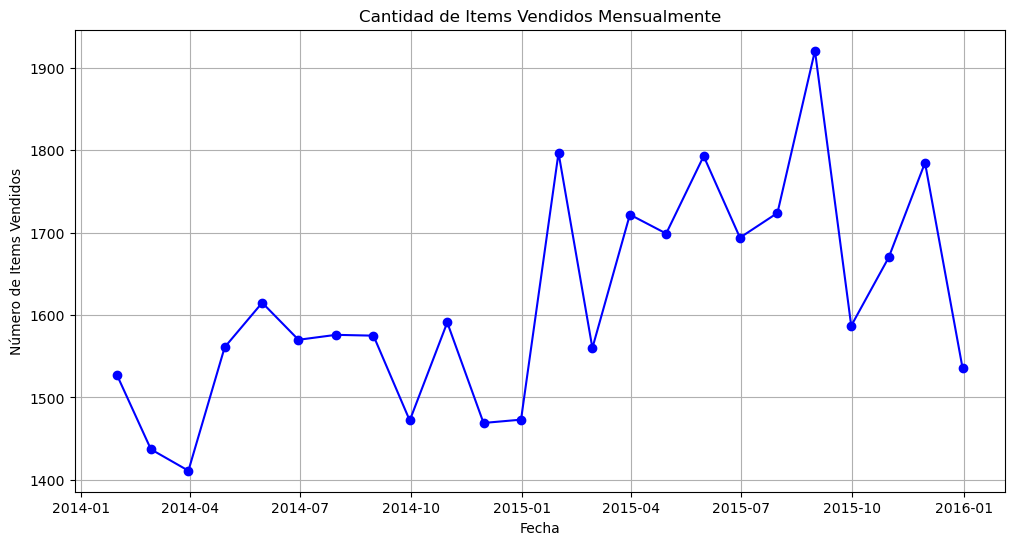

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Cantidad de Items Vendidos Mensualmente')
plt.xlabel('Fecha')
plt.ylabel('Número de Items Vendidos')
plt.grid(True)
plt.show()


In [26]:
data.head(5)

Member_number       Date   itemDescription Day Month  Year day_of_week  \
0           1808 2015-07-21    tropical fruit  21   Jul  2015     Tuesday   
1           2552 2015-01-05        whole milk  05   Jan  2015      Monday   
2           2300 2015-09-19         pip fruit  19   Sep  2015    Saturday   
3           1187 2015-12-12  other vegetables  12   Dec  2015    Saturday   
4           3037 2015-02-01        whole milk  01   Feb  2015      Sunday   

  weekday_weekend  
0         weekday  
1         weekday  
2         weekend  
3         weekend  
4         weekend

Year
2014    18277
2015    20488
dtype: int64


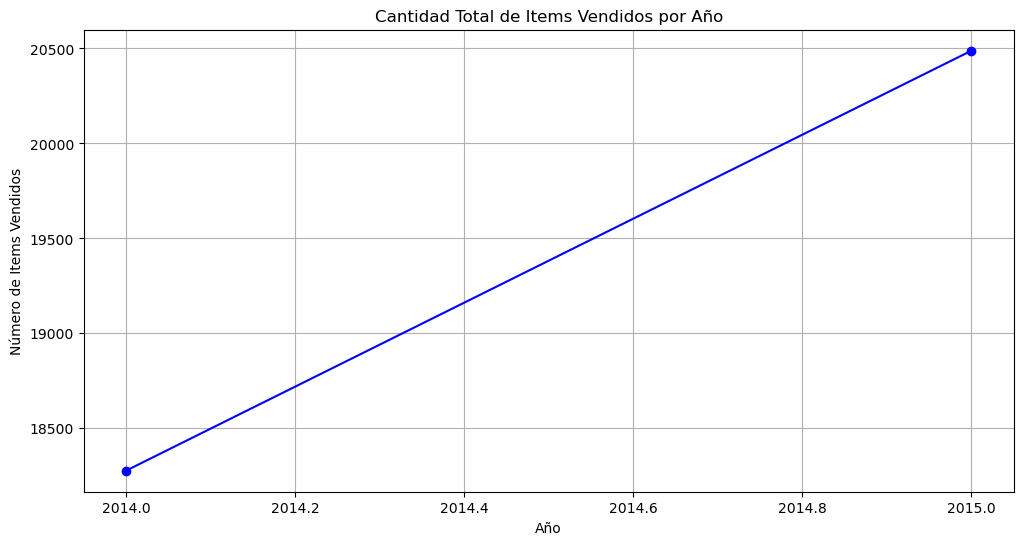

In [27]:

data['Date'] = pd.to_datetime(data['Date'])

# Extraer el año de la columna Date y agregarlo como una nueva columna en el DataFrame
data['Year'] = data['Date'].dt.year

# Agrupar por año y contar el número de items vendidos
annual_sales = data.groupby('Year').size()

# Mostrar los resultados
print(annual_sales)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-', color='b')
plt.title('Cantidad Total de Items Vendidos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Items Vendidos')
plt.grid(True)
plt.show()

## Ejercicio 1.3 Apriori

Ejecutar y analizar el siguiente código. Adicionalmente investigar el concepto de `lift` en el contexto del algoritmo `Apriori`

In [5]:
# Transformar los datos en un formato que entienda la función apriori
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# cada elemento tendrá 1: existe, 0: no existe
def encode_units(x):
    return 1 if x >= 1 else 0

basket = basket.applymap(encode_units)

In [6]:
# se ejecuta la función apriori
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Se generan las reglas de asociación en base a los resultados previos
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# las 15 reglas de asociación principales
top_rules = rules.sort_values(by='lift', ascending=False).head(15)

# Se convierten los antecedentes y concecuentes para poder mostrar
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Se crea la tabla de resultados
top_rules_table = top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(2)

# Se muestra la tabla con formato
from IPython.display import display, HTML
display(HTML(top_rules_table.to_html(index=False)))


In [7]:
# Plotly for support vs confidence vs lift
fig = px.scatter(top_rules, x='support', y='confidence', size='lift', color='lift', hover_data=['antecedents', 'consequents'],
                 title='Support vs Confidence vs Lift for Top 15 Association Rules', labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     "lift": "Lift"
                 })
# note for user to hover over points
fig.add_annotation(
    text="Hover over points to see itemset information",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False,
    font=dict(size=12, color="black")
)

fig.update_layout(width=1100, height=900)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

## Ejercicio 1.4 Modifique los hyperparámetros de APRIORI

En base al código del ejercicio anterior, leer la documentación de las funciones `apriori` y `association_rules`. Posteriormente, modifique los parámetros de `min_support` de la función `apriori` y los parámetros `metric` y `min_threshold` de la función `association_rules`. Analice y comente los resultados.

In [38]:
# inserte su código aquí

# se ejecuta la función apriori
frequent_itemsets = apriori(basket, min_support=0.09, use_colnames=True)

# Se generan las reglas de asociación en base a los resultados previos
rules = association_rules(frequent_itemsets, metric="conviction", min_threshold=1)

# las 15 reglas de asociación principales
top_rules = rules.sort_values(by='lift', ascending=False).head(15)

# Se convierten los antecedentes y concecuentes para poder mostrar
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Se crea la tabla de resultados
top_rules_table = top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(2)

# Se muestra la tabla con formato
from IPython.display import display, HTML
display(HTML(top_rules_table.to_html(index=False)))


In [39]:
# Plotly for support vs confidence vs lift
fig = px.scatter(top_rules, x='support', y='confidence', size='lift', color='lift', hover_data=['antecedents', 'consequents'],
                 title='Support vs Confidence vs Lift for Top 15 Association Rules', labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     "lift": "Lift"
                 })
# note for user to hover over points
fig.add_annotation(
    text="Hover over points to see itemset information",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False,
    font=dict(size=12, color="black")
)

fig.update_layout(width=1100, height=900)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()